# JSRT Dataset Analysis

http://db.jsrt.or.jp/eng.php

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

## Non-nodule images analysis

In [2]:
cnndat = pd.read_csv('./Clinical_Information/CNNDAT_EN2.txt', sep=' ', names = ['ImageID', 'Age', 'Sex', 'Type'], index_col=False)
cnndat

,ImageID,Age,Sex,Type
0,JPCNN001.IMG,30,female,non-nodule
1,JPCNN002.IMG,62,male,non-nodule
2,JPCNN003.IMG,70,female,non-nodule
3,JPCNN004.IMG,52,male,non-nodule
4,JPCNN005.IMG,25,male,non-nodule
...,...,...,...,...
88,JPCNN089.IMG,50,male,non-nodule
89,JPCNN090.IMG,68,female,non-nodule
90,JPCNN091.IMG,81,male,non-nodule
91,JPCNN092.IMG,70,female,non-nodule


### Metadata analysis

In [3]:
cnndat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  93 non-null     object
 1   Age      93 non-null     int64 
 2   Sex      93 non-null     object
 3   Type     93 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


In [4]:
cnndat['Type'].value_counts()

non-nodule    93
Name: Type, dtype: int64

In [5]:
cnndat.drop(['Type'], inplace = True, axis = 1)

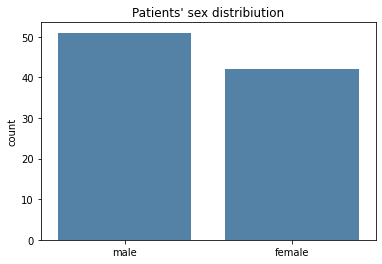

In [6]:
ax = sns.barplot(x = cnndat['Sex'].value_counts().index, y = cnndat['Sex'].value_counts(), color = 'steelblue')
ax.set(ylabel='count', title='Patients\' sex distribiution')
plt.show()

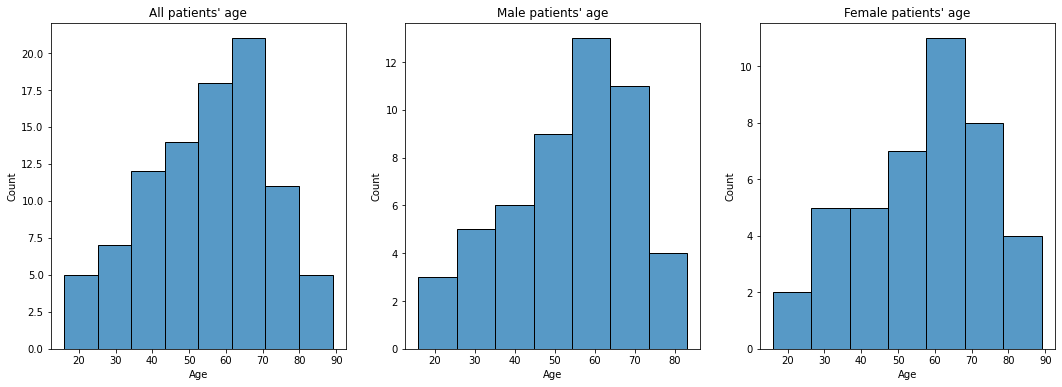

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].set_title("All patients' age")
axes[1].set_title("Male patients' age")
axes[2].set_title("Female patients' age")
sns.histplot(data = cnndat, x = 'Age', ax=axes[0])
sns.histplot(data = cnndat[cnndat['Sex'] == 'male'], x = 'Age', ax=axes[1])
sns.histplot(data = cnndat[cnndat['Sex'] == 'female'], x = 'Age', ax=axes[2])
plt.show()

### Images overwiev

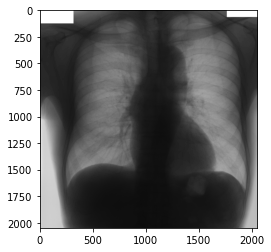

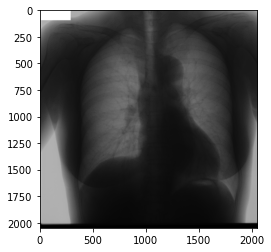

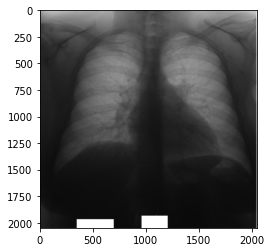

In [8]:
images_ids = cnndat['ImageID'].tolist()
indexes = random.sample(range(1, len(images_ids)), 3)
for i in range(3):
    input_filename = './All247images/' + cnndat.iloc[indexes[i], 0]
    shape = (2048, 2048)
    dtype = np.dtype('>u2')
    fid = open(input_filename, 'rb')
    data = np.fromfile(fid, dtype)
    image = data.reshape(shape)
    plt.imshow(image, cmap = "gray")
    plt.show()

## Images with nodules analysis

In [9]:
clndat = pd.read_csv('./Clinical_Information/CLNDAT_EN.txt', sep='\t', names = ['ImageID', 'Nodule_size', 'Degree_of_subtlety', 'Age','Sex','X','Y','Type','Location', 'Diagnosis'], index_col=False)
clndat

,ImageID,Nodule_size,Degree_of_subtlety,Age,Sex,X,Y,Type,Location,Diagnosis
0,JPCLN001.IMG,5,15,53,male,1634,692,malignant,l.upper,NaN
1,JPCLN002.IMG,5,30,78,female,1614,1090,benign,l.upper (S5),pulmonary hematoma
2,JPCLN003.IMG,5,30,63,female,1303,447,malignant,l.upper (S1+2),lung cancer
3,JPCLN004.IMG,5,14,68,female,606,836,benign,r.upper,NaN
4,JPCLN005.IMG,5,35,73,female,1438,692,malignant,l.upper (S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
149,JPCLN150.IMG,1,15,51,female,1544,1409,malignant,l.lower (S8),lung cancer(adenocarcinoma)
150,JPCLN151.IMG,1,14,37,female,1520,1364,malignant,l.lower,NaN
151,JPCLN152.IMG,1,10,56,male,1323,1438,benign,l.lower (S10),susp. hamartoma
152,JPCLN153.IMG,1,10,64,male,1708,1122,malignant,l.lower,NaN


### Metadata analysis

In [10]:
clndat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ImageID             154 non-null    object
 1   Nodule_size         154 non-null    int64 
 2   Degree_of_subtlety  154 non-null    int64 
 3   Age                 154 non-null    object
 4   Sex                 154 non-null    object
 5   X                   154 non-null    int64 
 6   Y                   154 non-null    int64 
 7   Type                154 non-null    object
 8   Location            154 non-null    object
 9   Diagnosis           122 non-null    object
dtypes: int64(4), object(6)
memory usage: 8.5+ KB


Age is not numeric.
#### Age

In [11]:
clndat['Age'].value_counts()

63    8
64    8
69    7
53    7
75    6
68    6
76    6
70    5
61    5
78    5
73    5
65    5
47    5
58    5
59    4
62    4
57    4
46    4
50    4
52    4
54    4
51    3
41    3
44    3
67    3
37    3
60    3
74    3
?     2
35    2
39    2
66    2
55    2
49    2
71    1
28    1
21    1
72    1
45    1
43    1
56    1
48    1
80    1
79    1
Name: Age, dtype: int64

In [12]:
clndat[clndat['Age'] == '?']

,ImageID,Nodule_size,Degree_of_subtlety,Age,Sex,X,Y,Type,Location,Diagnosis
105,JPCLN106.IMG,2,18,?,male,246,1233,malignant,r.lower,NaN
116,JPCLN117.IMG,2,12,?,female,377,1045,malignant,r.upper,NaN


In [13]:
tmp = clndat.drop([105,116], axis=0)
tmp['Age'].astype('int').median()

62.0

In [14]:
clndat["Age"].replace({"?": "62"}, inplace=True)
clndat["Age"] = clndat["Age"].astype(int)

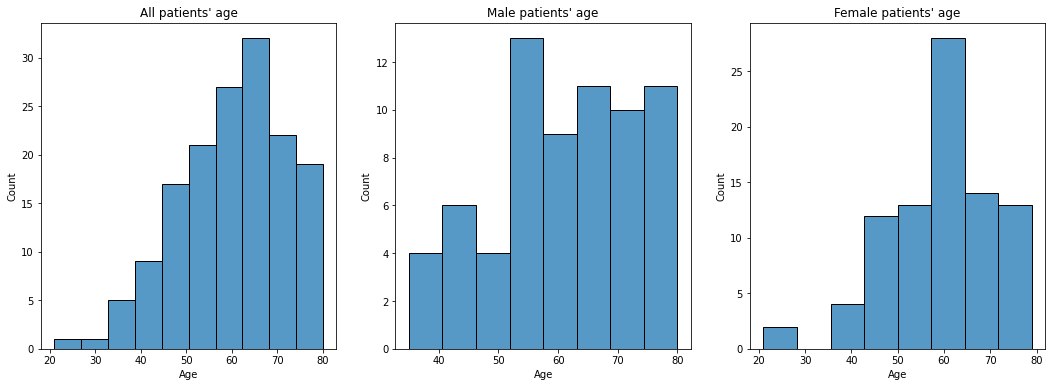

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].set_title("All patients' age")
axes[1].set_title("Male patients' age")
axes[2].set_title("Female patients' age")
sns.histplot(data = clndat, x = 'Age', ax=axes[0])
sns.histplot(data = clndat[clndat['Sex'] == 'male'], x = 'Age', ax=axes[1])
sns.histplot(data = clndat[clndat['Sex'] == 'female'], x = 'Age', ax=axes[2])
plt.show()

#### Sex

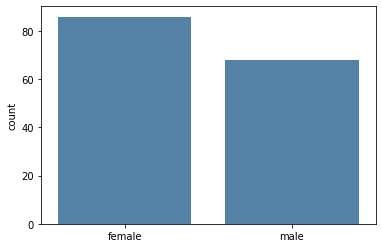

In [16]:
ax = sns.barplot(x = clndat['Sex'].value_counts().index, y = clndat['Sex'].value_counts(), color = 'steelblue')
ax.set(ylabel='count')
plt.show()

#### Nodule size

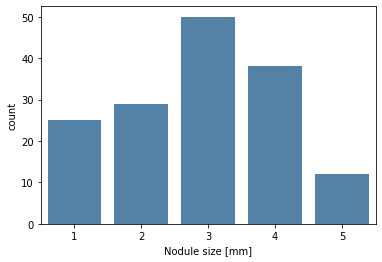

In [17]:
ax = sns.barplot(x = clndat['Nodule_size'].value_counts().index, y = clndat['Nodule_size'].value_counts(), color = 'steelblue')
ax.set(ylabel='count', xlabel='Nodule size [mm]')
plt.show()

#### Degree of subtlety

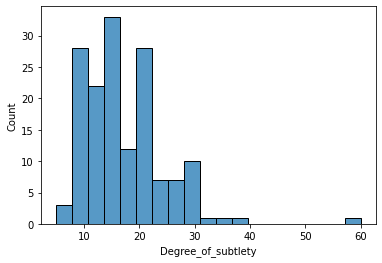

In [18]:
sns.histplot(data = clndat, x = 'Degree_of_subtlety')
plt.show()

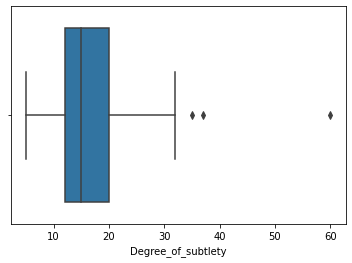

In [19]:
sns.boxplot(data = clndat, x = 'Degree_of_subtlety')
plt.show()

#### Nodule type

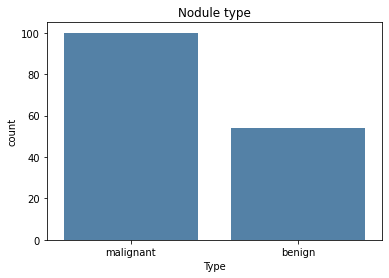

In [20]:
ax = sns.countplot(data = clndat, x = 'Type', color = 'steelblue')
ax.set(ylabel='count', title='Nodule type')
plt.show()

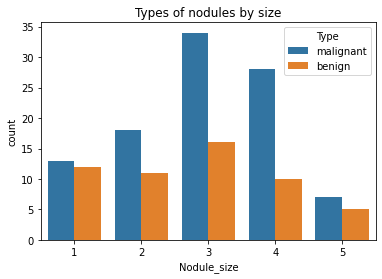

In [21]:
ax = sns.countplot(data = clndat, x = 'Nodule_size', hue = 'Type')
ax.set(ylabel='count', title='Types of nodules by size')
plt.show()

#### Location

In [22]:
clndat['Location'].value_counts()

r.upper (S2)       16
r.upper (S1)       15
r.upper            13
r.lower (S6)       10
left lung           9
l.upper (S1+2)      8
r.middle (S4)       7
r.upper (S3)        7
l.upper             7
l.lower (S6)        6
l.lower             6
l.upper (S3)        6
l.lower (S10)       6
r.lower             6
l.upper (S4)        5
r.middle            5
r.lower (S10)       3
r.lower (S9)        3
right lung          3
r.lower (S8)        2
l.upper (S5)        2
l.lower (S8)        2
r.lower (S7)        2
r.lower (S9-10)     1
r.middle (S5)       1
l.lower (S9)        1
r.upper (S2-S3)     1
l.lower (S6-S8)     1
Name: Location, dtype: int64

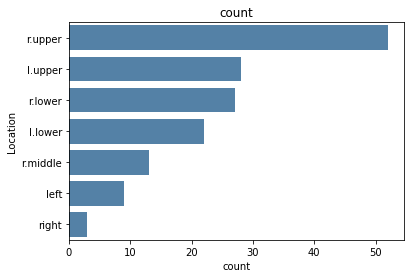

In [23]:
clndat['Location_modified'] = clndat.Location.str.split(' ').str[0]
ax = sns.countplot(data = clndat, y = clndat['Location_modified'], color = 'steelblue', order = clndat['Location_modified'].value_counts().index)
ax.set(ylabel='Location', title='count')
plt.show()

#### Diagnosis

In [24]:
clndat['Diagnosis'].value_counts()

lung cancer                                       40
lung cancer(adenocarcinoma)                       23
tuberculoma                                       14
lung cancer(bronchioloalveolar cell carcinoma)     7
metastasis of colon cancer                         4
pulmonary tuberculosis                             3
granuloma                                          3
unknown                                            3
lung abscess                                       2
sclerosing hemangioma                              2
Cryptococcosis                                     2
lung cancer(squamous cell carcinoma)               2
pulmonary hematoma                                 2
susp. inflammatory mass                            2
organiging pneumonia                               1
susp. lung metastasis                              1
susp. sclero, sing hemangioma                      1
metastasis of ovarian cancer                       1
lung cancer(adenosquamous carcinoma)          

In [25]:
clndat['Diagnosis_modified'] = clndat.Diagnosis.str.split('(').str[0]
clndat['Diagnosis_modified'].value_counts()

lung cancer                      75
tuberculoma                      14
metastasis of colon cancer        4
unknown                           3
granuloma                         3
pulmonary tuberculosis            3
lung abscess                      2
Cryptococcosis                    2
pulmonary hematoma                2
sclerosing hemangioma             2
susp. inflammatory mass           2
susp. lung metastasis             1
pneumonia                         1
lung canceror metastasis          1
organizing pneumonia              1
susp.tuberculoma                  1
metastasis of ovarian cancer      1
organiging pneumonia              1
susp. sclero, sing hemangioma     1
inflammatory mass                 1
susp. hamartoma                   1
Name: Diagnosis_modified, dtype: int64

#### Nodule size vs location

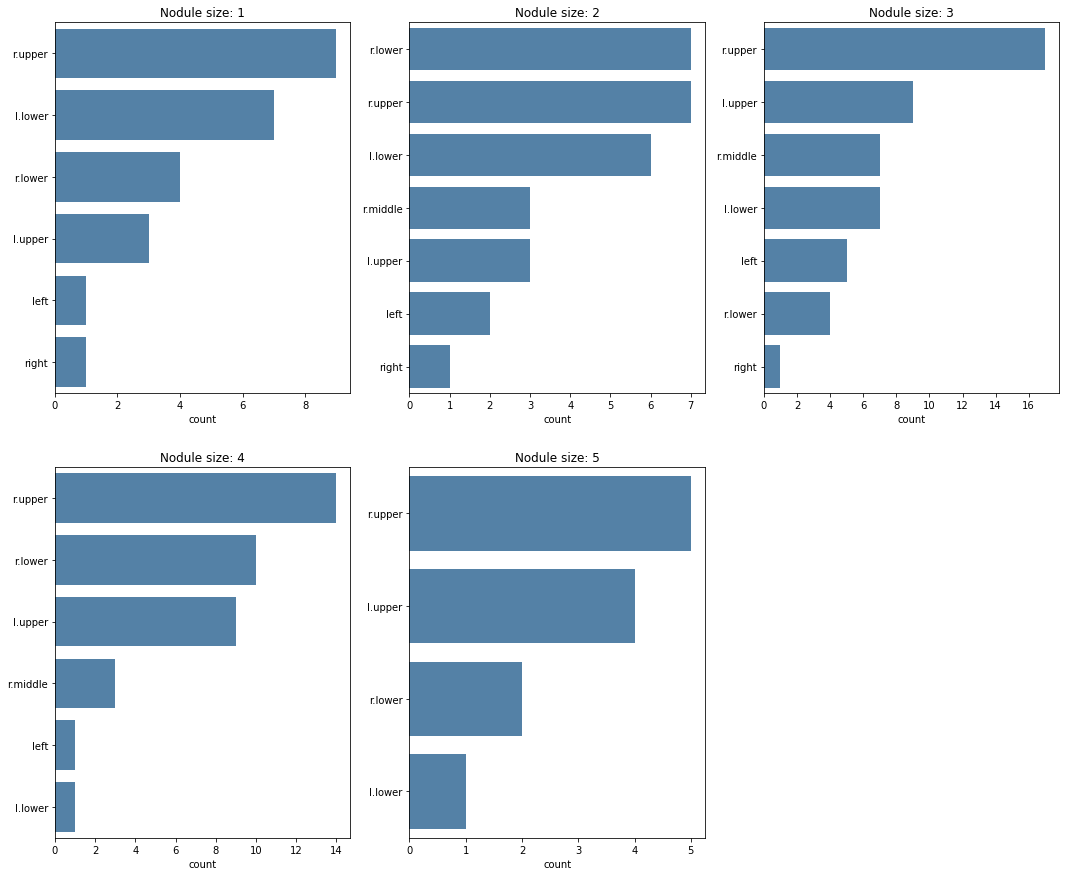

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
sns.barplot(y = clndat[clndat['Nodule_size'] == 1].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 1].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,0])
sns.barplot(y = clndat[clndat['Nodule_size'] == 2].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 2].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,1])
sns.barplot(y = clndat[clndat['Nodule_size'] == 3].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 3].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,2])
sns.barplot(y = clndat[clndat['Nodule_size'] == 4].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 4].Location_modified.value_counts(), color = 'steelblue', ax=axes[1,0])
sns.barplot(y = clndat[clndat['Nodule_size'] == 5].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 5].Location_modified.value_counts(), color = 'steelblue', ax=axes[1,1])
axes[0,0].set(title = "Nodule size: 1", xlabel = 'count')
axes[0,1].set(title = "Nodule size: 2", xlabel = 'count')
axes[0,2].set(title = "Nodule size: 3", xlabel = 'count')
axes[1,0].set(title = "Nodule size: 4", xlabel = 'count')
axes[1,1].set(title = "Nodule size: 5", xlabel = 'count')
axes[1,2].axis('off')
plt.show()

### Images overwiev

In [27]:
def annotate_and_show(nodule_size, n, cmap):
    df = clndat[clndat['Nodule_size'] == nodule_size]
    df = df.sample(n)
    filepaths = df['ImageID'].to_list()
    for i in range(n):
        input_filename = './All247images/' + filepaths[i]
        shape = (2048, 2048)
        dtype = np.dtype('>u2')
        fid = open(input_filename, 'rb')
        data = np.fromfile(fid, dtype)
        image = data.reshape(shape)
        plt.imshow(image, cmap = cmap)
        plt.plot(df.iloc[i,:].X, df.iloc[i,:].Y, 'o', ms=30, mec='b', mfc='none', mew=2)
        plt.show()
        print('Diagnosis:', df.iloc[i,:].Diagnosis, ', Location:', df.iloc[i,:].Location, ', Degree of subtlety:', df.iloc[i,:].Degree_of_subtlety, ', Type:', df.iloc[i,:].Type)

#### Nodule size: 5

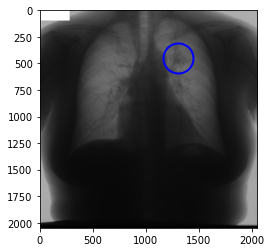

Diagnosis: lung cancer , Location: l.upper (S1+2) , Degree of subtlety: 30 , Type: malignant


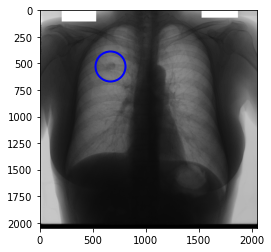

Diagnosis: tuberculoma , Location: r.upper (S2) , Degree of subtlety: 14 , Type: benign


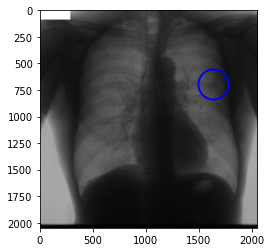

Diagnosis: nan , Location: l.upper , Degree of subtlety: 15 , Type: malignant


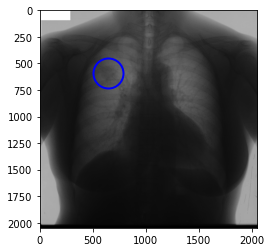

Diagnosis: lung cancer , Location: r.upper (S2) , Degree of subtlety: 25 , Type: malignant


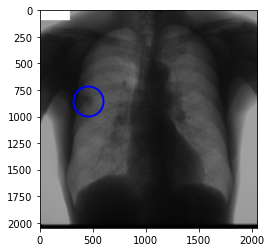

Diagnosis: lung cancer , Location: r.upper (S3) , Degree of subtlety: 18 , Type: malignant


In [28]:
annotate_and_show(5,5, 'gray')

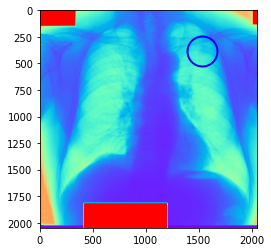

Diagnosis: lung cancer(squamous cell carcinoma) , Location: l.upper (S1+2) , Degree of subtlety: 20 , Type: malignant


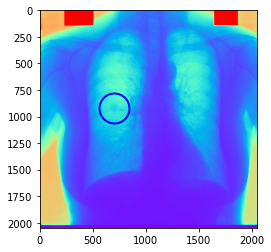

Diagnosis: lung cancer , Location: r.lower (S6) , Degree of subtlety: 10 , Type: malignant


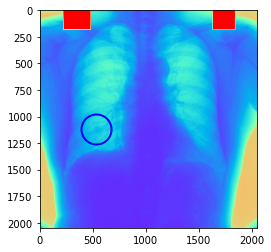

Diagnosis: nan , Location: r.lower , Degree of subtlety: 15 , Type: benign


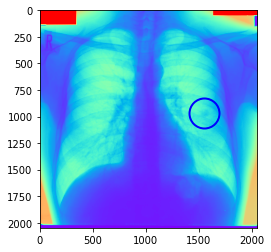

Diagnosis: lung cancer(adenocarcinoma) , Location: l.upper (S4) , Degree of subtlety: 13 , Type: malignant


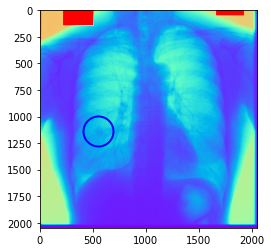

Diagnosis: lung cancer , Location: r.middle (S4) , Degree of subtlety: 15 , Type: malignant


In [29]:
annotate_and_show(4,5, 'rainbow')

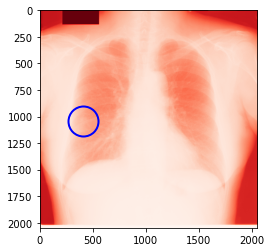

Diagnosis: lung cancer , Location: r.middle (S4) , Degree of subtlety: 12 , Type: malignant


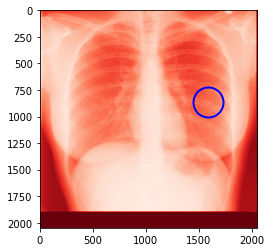

Diagnosis: nan , Location: l.lower , Degree of subtlety: 10 , Type: benign


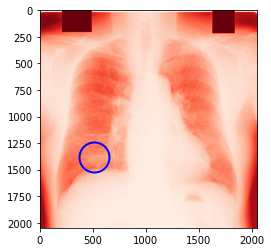

Diagnosis: nan , Location: r.lower , Degree of subtlety: 25 , Type: malignant


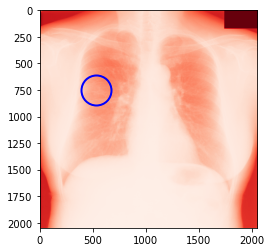

Diagnosis: lung cancer(adenocarcinoma) , Location: r.upper (S2) , Degree of subtlety: 26 , Type: malignant


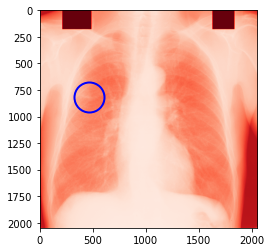

Diagnosis: lung cancer , Location: r.middle  , Degree of subtlety: 20 , Type: malignant


In [30]:
annotate_and_show(3,5, 'Reds')

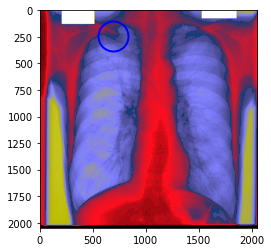

Diagnosis: lung cancer , Location: r.upper (S1) , Degree of subtlety: 15 , Type: malignant


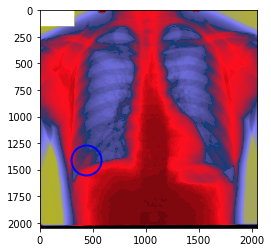

Diagnosis: pneumonia , Location: r.lower (S7) , Degree of subtlety: 15 , Type: benign


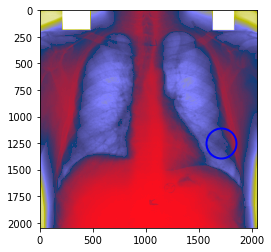

Diagnosis: nan , Location: l.lower , Degree of subtlety: 15 , Type: benign


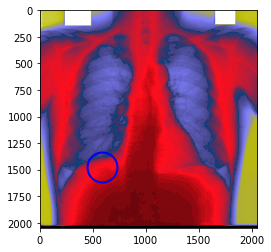

Diagnosis: lung cancer(adenocarcinoma) , Location: r.lower (S10) , Degree of subtlety: 30 , Type: malignant


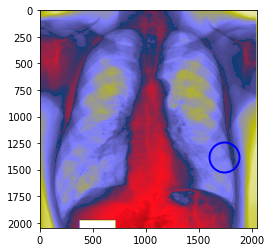

Diagnosis: lung cancer , Location: left lung , Degree of subtlety: 13 , Type: malignant


In [31]:
annotate_and_show(2,5, 'gist_stern')

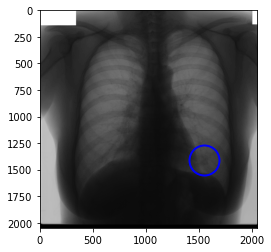

Diagnosis: lung cancer(adenocarcinoma) , Location: l.lower (S8) , Degree of subtlety: 15 , Type: malignant


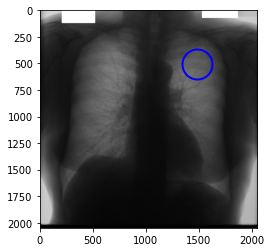

Diagnosis: sclerosing hemangioma , Location: l.upper (S3) , Degree of subtlety: 12 , Type: benign


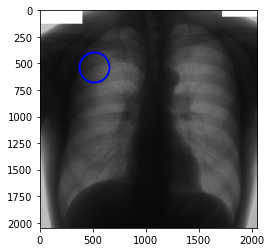

Diagnosis: pulmonary tuberculosis , Location: r.upper (S2) , Degree of subtlety: 12 , Type: benign


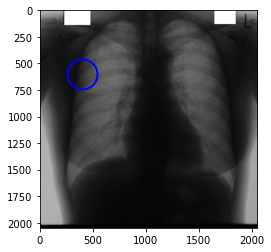

Diagnosis: lung cancer(adenocarcinoma) , Location: r.upper (S3) , Degree of subtlety: 10 , Type: malignant


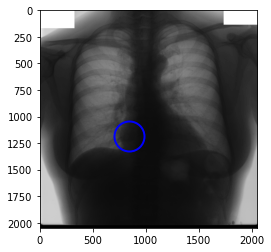

Diagnosis: nan , Location: r.lower , Degree of subtlety: 28 , Type: benign


In [32]:
annotate_and_show(1,5, 'gray')

- There are some random rectangles in some pictures, which I think could impact the model.
- Small nodules (1-3mm) are hardly visible and even the big ones can be tough to spot without annotation.
- Changing the cmap parameter does not help much.
- About 2/3 of the diagnosed nodules are lung cancers of different types.